# Agenda


*   Implement a simple Linear Regression from scratch
*   How to use Tensorflow
*   Implement MLP in Tensorflow
*   Compare with Keras



# Excercise 1: A simple Linear Regression from scratch

In this excercise we will implement a simple Linear Regression from scratch using only Numpy.




## Prepare dataset

In [ ]:
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt

def generate_data():  
  # Random from the “standard normal” distribution
  x = np.random.randn(2000,1)
  # Random noise
  noise = np.random.randn(2000,1)
  y = 3*x + noise + 2
  return x, y

In [ ]:
# TODO:
# 1. Get x,y from generate_data()
# 2. Print out the shape
x, y = generate_data()
print('Shape of x: ', x.shape)
print('Shape of y: ', y.shape)

Shape of x:  (2000, 1)
Shape of y:  (2000, 1)


## Visualize data

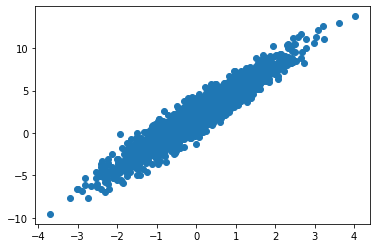

In [ ]:
# TODO
# 1. Show a scatter plot
plt.scatter(x, y)

## Prepare functions for your Neural Network

**Define constanst**

In [ ]:
# TODO
# 1. define below constants

# number of features of x
N = 1

# number of samples in x
M = x.shape[0]

# learning rate
ETA = 0.1

# epochs
EPOCHS = 100

**Define Loss function**

In [ ]:
def mean_squared_error(y_true, y_pred): # Batch GD: use all 
  loss = np.mean((y_true - y_pred)**2) / 2 # chia 2 trước để lát đạo hàm mất số 2 đi vì AI ko thích có số 2 (cho tiện lập trình)
  return loss

**Define helper functions**

4 bước của bài toán Deep Learning (using Neural Network) cơ bản: (thuật toán tối ưu Optimizers)

1/ Chọn trọng số ngẫu nhiên

2/ Tính y_hat (Feed Forward)

3/ Tính loss

4/ Cập nhật trọng số (Đạo hàm: Gradient Descent)

In [ ]:
def feed_forward(x, w, b):
  y_pred = x * w + b
  return y_pred

def back_propagation(x, y_true, y_pred):
  dw = -np.mean((y_true - y_pred) * x) # 2 vectors nhân từng phần tử (element-wise)
  db = -np.mean(y_true - y_pred) # np.mean() = 1/m * np.sum
  return dw, db 

def gradient_descent(w, dw, b, db, eta): # eta: learning rate
  w = w - eta * dw
  b = b - eta * db
  return w, b

def generate_weight_bias(): # symmetric nên ko thể w = 0
  w = np.ones(shape=(N,1)) # weight ko đc = 0
  b = 0 # b có thể = 0
  return w, b

def train(x, y, ETA, EPOCHS):
  w, b = generate_weight_bias()
  for i in range(1, EPOCHS+1):
    y_pred = feed_forward(x, w, b)
    loss = mean_squared_error(y, y_pred)
    if i % 10 == 0:
      print('iter %d, loss: %f' % (i, loss)) # sau mỗi 10 iter thì in loss ra coi có tiến bộ ko
    dw, db = back_propagation(x, y, y_pred)
    w, b = gradient_descent(w, dw, b, db, ETA)
  return w, b 

**Start Training**

iter 10, loss: 1.075467
iter 20, loss: 0.558688
iter 30, loss: 0.500503
iter 40, loss: 0.493922
iter 50, loss: 0.493174
iter 60, loss: 0.493088
iter 70, loss: 0.493079
iter 80, loss: 0.493078
iter 90, loss: 0.493077
iter 100, loss: 0.493077
weight:  [[3.01587236]]
bias:  1.997104492278644


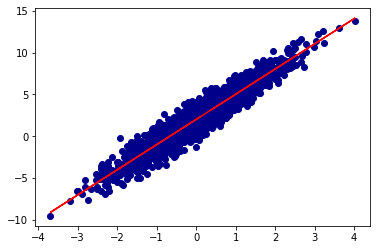

In [ ]:
# TODO
# 1. Call train() to get w,b
# 2. Call feed_forward() to get y_pred
# 3. Plot
w, b = train(x, y, ETA, EPOCHS)
print('weight: ', w)
print('bias: ', b)
y_pred = feed_forward(x, w, b)
plt.scatter(x, y, c='darkblue')
plt.plot(x, y_pred, c='red')
plt.show()

# Excercise 2: TensorFlow 2.0

## Computational Graph

Example 1:

<img width="500" height="300" src="https://i.imgur.com/1piZLRs.png">

Example 2:

<img width="500" height="300" src="https://i.imgur.com/K4JfU0K.png">


## Neural Network using TF 2.0

### Prepare dataset


In [ ]:
import math
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt

def generate_data():
  N = 5000 # number of points per class
  d0 = 2 # dimensionality
  C = 3 # number of classes
  X = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[:, ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  X = X.T
  return X, y

In [ ]:
X,y = generate_data()
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (15000, 2)
Shape of y: (15000,)


### Visualize data

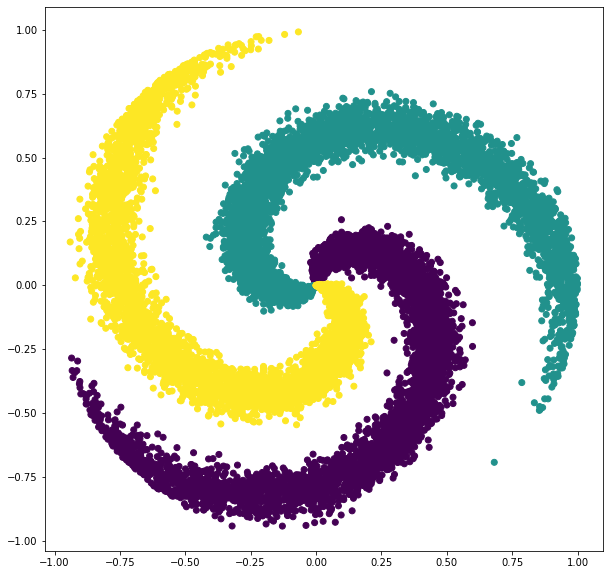

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Define and model using TensorFlow

Trong Tensorflow sẽ có Keras: dùng Keras cũ hoặc cách dưới đều đc (Google mua cả 2 rồi)

In [ ]:
import tensorflow as tf
np.random.seed(1612)

In [ ]:
# Define custom model
class CuteMLP(tf.keras.Model):
    def __init__(self):
        super(CuteMLP, self).__init__()
        self.W1 = tf.Variable(tf.random.uniform(shape=[2,100],minval=0, maxval=1), name='W1')
        self.W2 = tf.Variable(tf.random.uniform(shape=[100,3],minval=0, maxval=1), name='W2')
        self.b1 = tf.Variable(0.1, name='b1')
        self.b2 = tf.Variable(0.2, name='b2') 
    def call(self, X):
        # size:
        # - X  : 300*2
        # - W1 : 2*100
        # - W2 : 100*10
        Z1 = tf.matmul(X, self.W1) + self.b1
        A1 = tf.nn.relu(Z1)
        Z2 = tf.matmul(A1, self.W2) + self.b2
        Y_hat = tf.nn.softmax(Z2)
        return Y_hat
def loss(model, X, y):
    Y     = tf.one_hot(indices=y, depth=3)
    Y_hat = model(X)
    N = Y.shape[0]
    cost = -tf.reduce_sum(Y*tf.math.log(Y_hat))/N
    return cost
# compute the gradient of `loss_value` w.r.t `model.W` and `model.B`
def grad(model, X, y):
    # here we use `tf.GradientTape` to record intermediate values of the computations
    # and compute gradients (as given in the example above) 
    with tf.GradientTape() as tape:
        loss_value = loss(model, X, y)
    gradient = tape.gradient(loss_value, [model.W1, model.W2, model.b1, model.b2])
    return gradient

Train model


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Initial loss: 1.075
0 1.0265318
1000 0.65119636
2000 0.5220565
3000 0.4460251
4000 0.38268816
5000 0.33508444
6000 0.29520085
7000 0.26394454
8000 0.23933941
9000 0.21959251
10000 0.20302545
11000 0.18907161
12000 0.17702052
13000 0.16654189
14000 0.15741764
15000 0.14932832
16000 0.14209032
17000 0.13547918
18000 1.1006297
19000 1.0987035
Final loss: 1.099


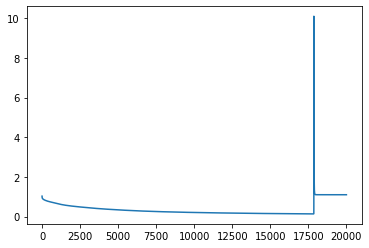

In [ ]:
# define model, optimizer and compute the initial loss
model = CuteMLP()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

print("Initial loss: {:.3f}".format(loss(model, X, y)))

# train
loss_history = []
for i in range(20000): # learning rate: số bước đi nếu mấp mô thì bước nhỏ cũng là dài
    grads = grad(model, X, y)
    optimizer.apply_gradients(zip(grads, [model.W1, model.W2, model.b1, model.b2]))
    l = loss(model, X, y)
    if i%1000 == 0:
        print(i, l.numpy())
    loss_history.append(l)

# finalize the training by printing the final loss and plot the learning curve
print("Final loss: {:.3f}".format(loss(model, X, y)))
plt.plot(range(len(loss_history)), loss_history)
plt.show()

Accuracy of model

In [ ]:
Y_hat = model(X).numpy()
y_hat = np.argmax(Y_hat, axis=1)
acc = (100*np.mean(y_hat == y))
print('Training accuracy: %.2f %%' % acc)

Training accuracy: 33.29 %
